# Image Compression Using K-Means Clustering Algorithm

### Loading Image

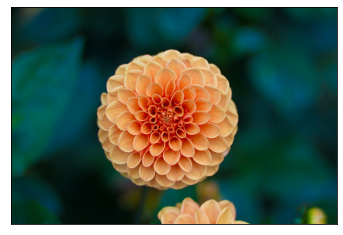

In [1]:

from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt
flower_img = load_sample_image('flower.jpg')
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower_img)

In [2]:
flower_img.shape
flower_img

array([[[ 2, 19, 13],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 1, 77, 64],
        [ 0, 76, 64],
        [ 0, 75, 63]],

       [[ 1, 18, 12],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 0, 76, 64],
        [ 1, 74, 65],
        [ 1, 74, 65]],

       [[ 2, 17, 12],
        [ 6, 19, 12],
        [ 7, 20, 13],
        ...,
        [ 1, 74, 65],
        [ 1, 74, 67],
        [ 1, 74, 67]],

       ...,

       [[ 0, 46, 40],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 5, 44, 26],
        [ 6, 43, 26],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 6, 45, 27],
        [ 7, 44, 27],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 0, 46, 36],
        ...,
        [ 7, 46, 28],
        [ 8, 45, 28],
        [ 9, 43, 27]]], dtype=uint8)

### Reshaping Image Dataset

In [3]:
data = flower_img / 255.0   # use 0......1 scale
print(data.shape)
print(f'\nBefore : {data}')
data = data.reshape(427 * 640, 3)
print(data.shape)
print(f'\nAfter : {data}')

(427, 640, 3)

Before : [[[0.00784314 0.0745098  0.05098039]
  [0.01176471 0.07058824 0.05098039]
  [0.02745098 0.07843137 0.05098039]
  ...
  [0.00392157 0.30196078 0.25098039]
  [0.         0.29803922 0.25098039]
  [0.         0.29411765 0.24705882]]

 [[0.00392157 0.07058824 0.04705882]
  [0.01176471 0.07058824 0.05098039]
  [0.02745098 0.07843137 0.05098039]
  ...
  [0.         0.29803922 0.25098039]
  [0.00392157 0.29019608 0.25490196]
  [0.00392157 0.29019608 0.25490196]]

 [[0.00784314 0.06666667 0.04705882]
  [0.02352941 0.0745098  0.04705882]
  [0.02745098 0.07843137 0.05098039]
  ...
  [0.00392157 0.29019608 0.25490196]
  [0.00392157 0.29019608 0.2627451 ]
  [0.00392157 0.29019608 0.2627451 ]]

 ...

 [[0.         0.18039216 0.15686275]
  [0.00392157 0.18823529 0.15686275]
  [0.00392157 0.18431373 0.14509804]
  ...
  [0.01960784 0.17254902 0.10196078]
  [0.02352941 0.16862745 0.10196078]
  [0.02745098 0.17254902 0.10588235]]

 [[0.         0.18431373 0.16078431]
  [0.00392157

### Plotting Data Points of RGB Colors

In [4]:
import numpy as np
def plot_pixels(data, title, colors=None, N=10000):
  if colors is None:
    colors = data
  
  # choose a random subset
  rng = np.random.RandomState(0)
  i = rng.permutation(data.shape[0])[:N]
  colors = colors[i]
  R, G, B = data[i].T

  fig, ax = plt.subplots(1, 2, figsize=(16, 6))
  ax[0].scatter(R, G, color=colors, marker='.')
  ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))
  ax[0].grid()

  ax[1].scatter(R, B, color=colors, marker='.')
  ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))
  ax[1].grid()

  fig.suptitle(title, size=20)

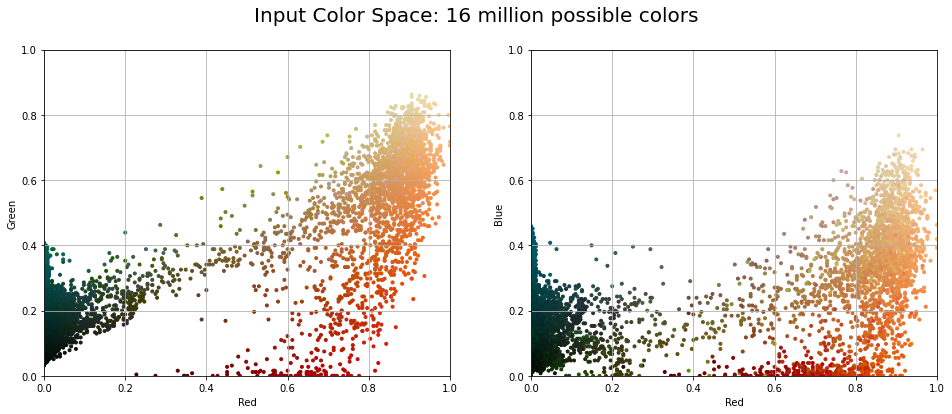

In [5]:
plot_pixels(data, title='Input Color Space: 16 million possible colors')

### Employing K-Means Clustering Algorithm

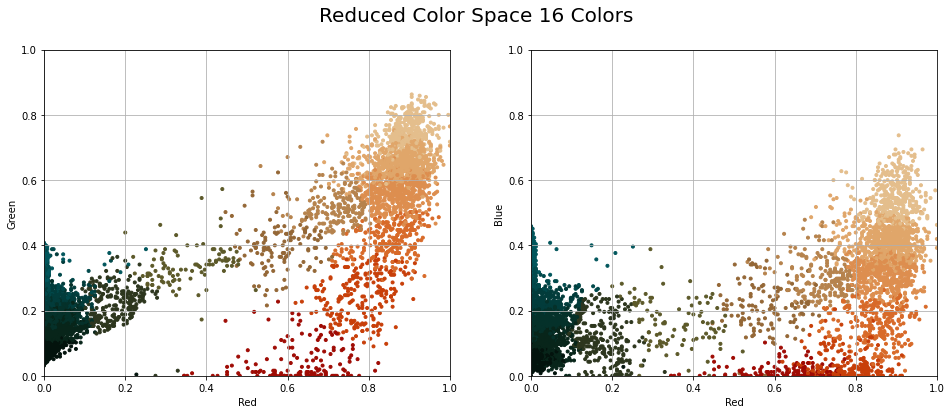

In [6]:
import warnings
warnings.simplefilter('ignore') # Fix Numpy Issues

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors, title='Reduced Color Space 16 Colors')

Text(0.5, 1.0, '16-Color Image')

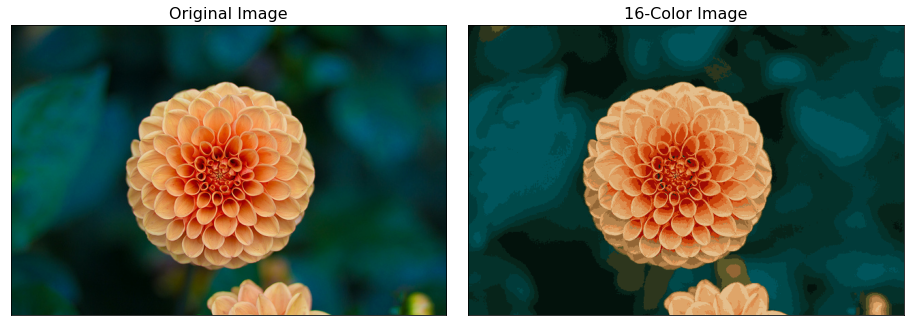

In [7]:
flower_img_reloaded = new_colors.reshape(flower_img.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))

fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower_img)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(flower_img_reloaded)
ax[1].set_title('16-Color Image', size=16)

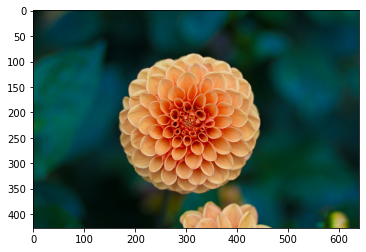

In [8]:
plt.imshow(flower_img)

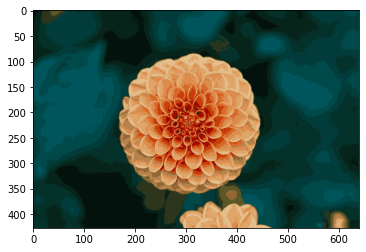

In [9]:
plt.imshow(flower_img_reloaded)